In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# available dataframes
recipes = pd.read_csv("/data/foodboost/recipes.csv")
ingredients = pd.read_csv("/data/foodboost/ingredients.csv")
nutritions = pd.read_csv("/data/foodboost/nutritions.csv")
tags = pd.read_csv("/data/foodboost/tags.csv")

In [2]:
# EXPLORE: RECIPES DATAFRAME
display(recipes.head())
print(recipes.info())
display(recipes.describe())
print(recipes.shape)

,Unnamed: 0,title,persons,time,calories,stars,url,image
0,0,Kruidnoten met choco-discodip,4,25,260,0,https://www.ah.nl/allerhande/recept/R-R1195893...,https://static.ah.nl/static/recepten/img_RAM_P...
1,0,Kruidnoten in marsepein,4,25,265,0,https://www.ah.nl/allerhande/recept/R-R1195892...,https://static.ah.nl/static/recepten/img_RAM_P...
2,0,Kruidnoten met chocodips,4,25,335,0,https://www.ah.nl/allerhande/recept/R-R1195891...,https://static.ah.nl/static/recepten/img_RAM_P...
3,0,Pepernotentaart met marsepeinstrik,10,30,560,0,https://www.ah.nl/allerhande/recept/R-R1195887...,https://static.ah.nl/static/recepten/img_RAM_P...
4,0,Perencake,12,10,265,0,https://www.ah.nl/allerhande/recept/R-R1195790...,https://static.ah.nl/static/recepten/img_RAM_P...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8706 non-null   int64 
 1   title       8706 non-null   object
 2   persons     8706 non-null   int64 
 3   time        8706 non-null   int64 
 4   calories    8706 non-null   int64 
 5   stars       8706 non-null   int64 
 6   url         8706 non-null   object
 7   image       8706 non-null   object
dtypes: int64(5), object(3)
memory usage: 544.2+ KB
None


,Unnamed: 0,persons,time,calories,stars
count,8706.0,8706.000000,8706.000000,8706.000000,8706.0
mean,0.0,5.405697,22.093039,453.029405,0.0
std,0.0,4.791495,13.387928,231.581738,0.0
min,0.0,1.000000,1.000000,0.000000,0.0
25%,0.0,4.000000,15.000000,270.000000,0.0
50%,0.0,4.000000,20.000000,460.000000,0.0
75%,0.0,4.000000,30.000000,615.000000,0.0
max,0.0,100.000000,320.000000,3320.000000,0.0


(8706, 8)


In [3]:
# DATA PREPROCESSING 1: some title errors (&amp; &nbsp;) due to HTML web scraping

error_replacement = {
    '&amp;': '&',
    '&nbsp;': ' '
}

affected_dfs = [(recipes, 'title'), (ingredients, 'recipe'), (nutritions, 'recipe'), (tags, 'recipe'), (tags, 'tag')]

# execute for each error in each dataframe column
for df in affected_dfs:
    for error in error_replacement.keys():
        # find error titles
        error_filter = df[0][df[1]].str.contains(error)
        error_titles = df[0].loc[error_filter, df[1]]
        #print(error_titles.head())
        
        # quantify the amount of errors
        error_count = len(error_titles)
        error_perc = round((error_count / len(df[0][df[1]])) * 100, 1)
        print(f'Total of {error_count}  {error} errors which is {error_perc}% of all rows')
        
        # fix errors
        df[0][df[1]] = df[0][df[1]].str.replace(error, error_replacement.get(error))
        print(f'{error} error has been fixed')
        
        # check if errors still exist
        corrected_filter = df[0][df[1]].str.contains(error_replacement.get(error))
        corrected_titles = df[0].loc[corrected_filter, df[1]]
        #print(corrected_titles.head())
        error_titles = df[0].loc[error_filter, df[1]]
        error_count = len(error_titles)
        error_perc = round((error_count / len(df[0][df[1]])) * 100, 1)
        print(f'Total of {error_count}  {error} errors which is {error_perc}% of all rows \n')
        
        # TO DO: assert statements

Total of 646  &amp; errors which is 7.4% of all rows
&amp; error has been fixed
Total of 646  &amp; errors which is 7.4% of all rows 

Total of 2  &nbsp; errors which is 0.0% of all rows
&nbsp; error has been fixed
Total of 2  &nbsp; errors which is 0.0% of all rows 

Total of 5646  &amp; errors which is 7.9% of all rows
&amp; error has been fixed
Total of 5646  &amp; errors which is 7.9% of all rows 

Total of 16  &nbsp; errors which is 0.0% of all rows
&nbsp; error has been fixed
Total of 16  &nbsp; errors which is 0.0% of all rows 

Total of 4634  &amp; errors which is 7.9% of all rows
&amp; error has been fixed
Total of 4634  &amp; errors which is 7.9% of all rows 

Total of 16  &nbsp; errors which is 0.0% of all rows
&nbsp; error has been fixed
Total of 16  &nbsp; errors which is 0.0% of all rows 

Total of 3266  &amp; errors which is 7.1% of all rows
&amp; error has been fixed
Total of 3266  &amp; errors which is 7.1% of all rows 

Total of 9  &nbsp; errors which is 0.0% of all r

In [4]:
# DATA PREPROCESSING 2: some useless columns (Unnamed: 0)

# delete unnecessary columns
recipes.drop(columns='Unnamed: 0', inplace=True)
ingredients.drop(columns='Unnamed: 0', inplace=True)
nutritions.drop(columns='Unnamed: 0', inplace=True)
tags.drop(columns='Unnamed: 0', inplace=True)

In [5]:
# EXPLORE: NUTRITIONS DATAFRAME
display(nutritions.head(10), "\n")
print(nutritions.info(), "\n")
display(nutritions.describe(), "\n")
print(nutritions.shape, "\n")

,recipe,nutrition,value
0,Kruidnoten met choco-discodip,energie,260 kcal
1,Kruidnoten met choco-discodip,koolhydraten,34 g
2,Kruidnoten met choco-discodip,waarvan suikers,22 g
3,Kruidnoten met choco-discodip,natrium,200 mg
4,Kruidnoten met choco-discodip,eiwit,3 g
5,Kruidnoten met choco-discodip,vet,12 g
6,Kruidnoten met choco-discodip,waarvan verzadigd,7 g
7,Kruidnoten met choco-discodip,vezels,1 g
8,Kruidnoten in marsepein,energie,265 kcal
9,Kruidnoten in marsepein,koolhydraten,43 g


'\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58765 entries, 0 to 58764
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   recipe     58765 non-null  object
 1   nutrition  58765 non-null  object
 2   value      58765 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB
None 



,recipe,nutrition,value
count,58765,58765,58765
unique,8706,8,1192
top,Kruidnoten met choco-discodip,energie,1 g
freq,8,8706,2079


'\n'

(58765, 3) 



['energie' 'koolhydraten' 'waarvan suikers' 'natrium' 'eiwit' 'vet'
 'waarvan verzadigd' 'vezels'] 

energie              8706
koolhydraten         8663
eiwit                8596
vet                  8480
waarvan verzadigd    7992
natrium              7302
vezels               7173
waarvan suikers      1853
Name: nutrition, dtype: int64


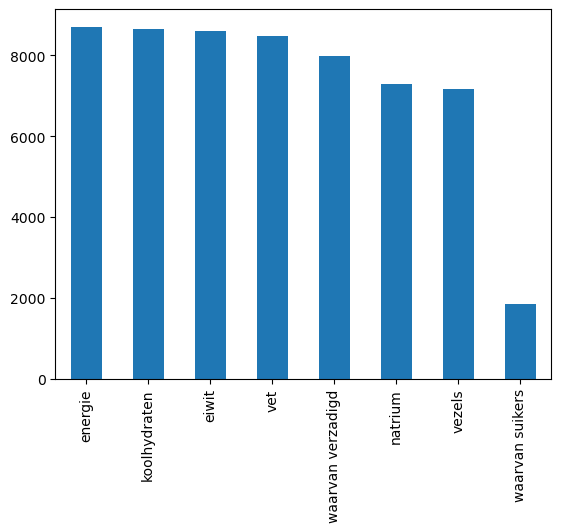

In [6]:
# get unique nutrition categories and quantify (1 recipe has a maximum of 8 nutrition categories)
nutritions_categories = nutritions['nutrition'].unique()
print(nutritions_categories, '\n')

nutritions_counts = nutritions['nutrition'].value_counts()
print(nutritions_counts)
nutritions_counts.plot.bar()

# create filter for each category
nutritions_filters = {}
for category in nutritions_categories:
    nutritions_filters.update({category: nutritions['nutrition'] == category})

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,energie,260,kcal
Kruidnoten in marsepein,energie,265,kcal
Kruidnoten met chocodips,energie,335,kcal
Pepernotentaart met marsepeinstrik,energie,560,kcal
Perencake,energie,265,kcal


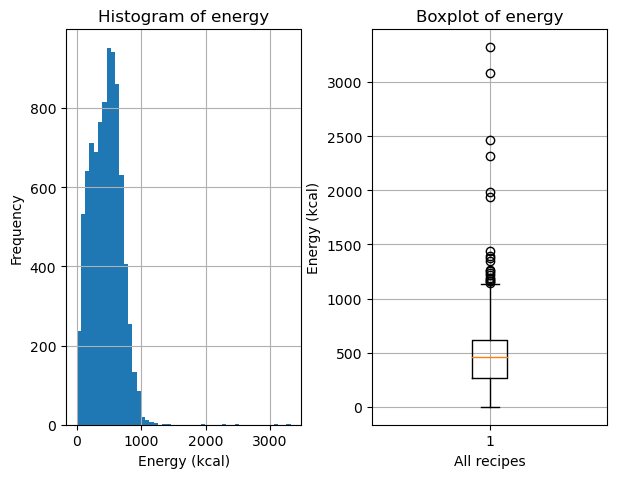

In [7]:
# ANALYSE 1: ENERGY CATEGORY

# make dataframe copy for energy
nutritions_energy = nutritions[nutritions_filters.get('energie')].copy()
nutritions_energy = nutritions_energy.set_index('recipe')

# convert 'value' column type to int64
nutritions_energy['value'] = nutritions_energy['value'].str.replace(' kcal', '').astype(int)

# retain unit of measurement
nutritions_energy['unit'] = 'kcal'
display(nutritions_energy.head())

# histogram and boxplot of energy
fig, (energy_ax1, energy_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
energy_ax1.hist(nutritions_energy['value'], bins=50)
energy_ax1.set_xlabel('Energy (kcal)')
energy_ax1.set_ylabel('Frequency')
energy_ax1.set_title('Histogram of energy')
energy_ax1.grid()

# boxplot
energy_ax2.boxplot(nutritions_energy['value'])
energy_ax2.set_xlabel('All recipes')
energy_ax2.set_ylabel('Energy (kcal)')
energy_ax2.set_title('Boxplot of energy')
energy_ax2.grid()

plt.show()

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,natrium,200,mg
Kruidnoten in marsepein,natrium,120,mg
Kruidnoten met chocodips,natrium,160,mg
Pepernotentaart met marsepeinstrik,natrium,240,mg
Perencake,natrium,120,mg


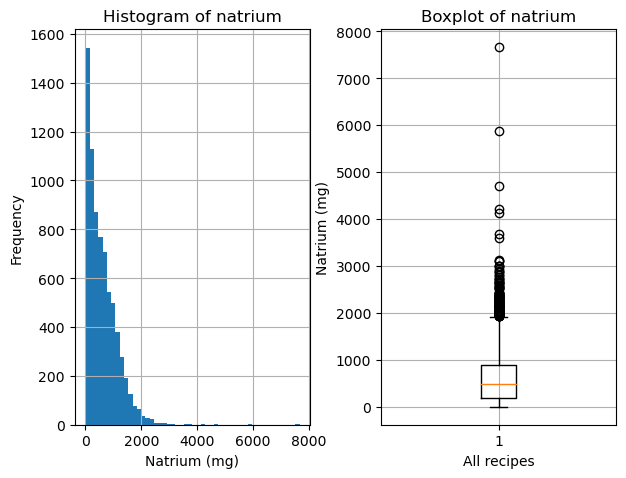

In [8]:
# ANALYSE 2: NATRIUM CATEGORY

# make dataframe copy for natrium
nutritions_natrium = nutritions[nutritions_filters.get('natrium')].copy()
nutritions_natrium = nutritions_natrium.set_index('recipe')

# convert 'value' column type to int64
nutritions_natrium['value'] = nutritions_natrium['value'].str.replace(' mg', '').astype(float).astype(int)

# retain unit of measurement
nutritions_natrium['unit'] = 'mg'
display(nutritions_natrium.head())

# histogram and boxplot of natrium
fig, (natrium_ax1, natrium_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
natrium_ax1.hist(nutritions_natrium['value'], bins=50)
natrium_ax1.set_xlabel('Natrium (mg)')
natrium_ax1.set_ylabel('Frequency')
natrium_ax1.set_title('Histogram of natrium')
natrium_ax1.grid()

# boxplot
natrium_ax2.boxplot(nutritions_natrium['value'])
natrium_ax2.set_xlabel('All recipes')
natrium_ax2.set_ylabel('Natrium (mg)')
natrium_ax2.set_title('Boxplot of natrium')
natrium_ax2.grid()

plt.show()

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,eiwit,3,g
Kruidnoten in marsepein,eiwit,3,g
Kruidnoten met chocodips,eiwit,5,g
Pepernotentaart met marsepeinstrik,eiwit,5,g
Perencake,eiwit,5,g


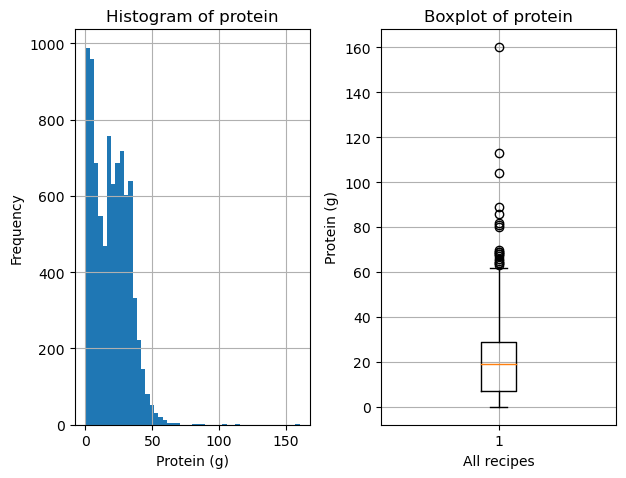

In [9]:
# ANALYSE 3: EIWIT CATEGORY

# make dataframe copy for protein
nutritions_protein = nutritions[nutritions_filters.get('eiwit')].copy()
nutritions_protein = nutritions_protein.set_index('recipe')

# convert 'value' column type to int64
nutritions_protein['value'] = nutritions_protein['value'].str.replace(' g', '').astype(float).astype(int)

# retain unit of measurement
nutritions_protein['unit'] = 'g'
display(nutritions_protein.head())

# histogram and boxplot of protein
fig, (protein_ax1, protein_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
protein_ax1.hist(nutritions_protein['value'], bins=50)
protein_ax1.set_xlabel('Protein (g)')
protein_ax1.set_ylabel('Frequency')
protein_ax1.set_title('Histogram of protein')
protein_ax1.grid()

# boxplot
protein_ax2.boxplot(nutritions_protein['value'])
protein_ax2.set_xlabel('All recipes')
protein_ax2.set_ylabel('Protein (g)')
protein_ax2.set_title('Boxplot of protein')
protein_ax2.grid()

plt.show()

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,vezels,1,g
Kruidnoten in marsepein,vezels,1,g
Kruidnoten met chocodips,vezels,6,g
Pepernotentaart met marsepeinstrik,vezels,1,g
Perencake,vezels,1,g


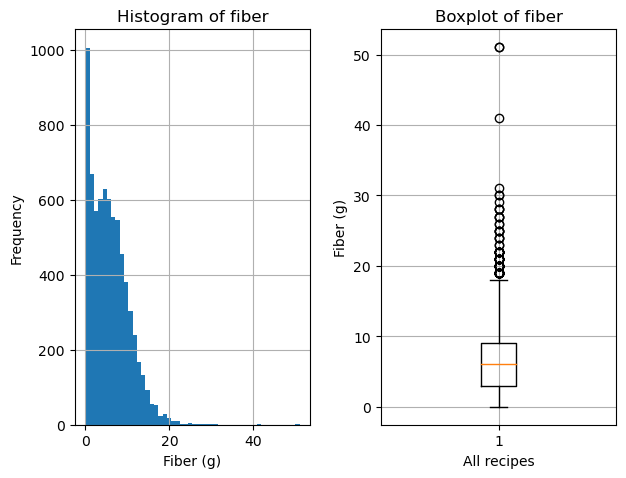

,nutrition,value,unit
recipe,,,
Gevulde flatbreads met vegaballetjes en zelfgemaakte fetadip,vezels,1640,g
Bart van Olphens zalmcarpaccio,vezels,190,g
Roggebrood met noten en bessen,vezels,85,g
Pompoen-kaasschotel,vezels,400,g


In [10]:
# ANALYSE 4: VEZELS CATEGORY

# make dataframe copy for fiber
nutritions_fiber = nutritions[nutritions_filters.get('vezels')].copy()
nutritions_fiber = nutritions_fiber.set_index('recipe')

# convert 'value' column type to int64
nutritions_fiber['value'] = nutritions_fiber['value'].str.replace(' g', '').astype(float).astype(int)

# retain unit of measurement
nutritions_fiber['unit'] = 'g'
display(nutritions_fiber.head())

# very large outlier filtering
fiber_outlier_filter = nutritions_fiber['value'] < 85
# fiber_values = nutritions_fiber['value'].value_counts()
# print(fiber_values)

# histogram and boxplot of fiber
fig, (fiber_ax1, fiber_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
fiber_ax1.hist(nutritions_fiber.loc[fiber_outlier_filter, 'value'], bins=50)
fiber_ax1.set_xlabel('Fiber (g)')
fiber_ax1.set_ylabel('Frequency')
fiber_ax1.set_title('Histogram of fiber')
fiber_ax1.grid()

# boxplot
fiber_ax2.boxplot(nutritions_fiber.loc[fiber_outlier_filter, 'value'])
fiber_ax2.set_xlabel('All recipes')
fiber_ax2.set_ylabel('Fiber (g)')
fiber_ax2.set_title('Boxplot of fiber')
fiber_ax2.grid()

plt.show()

# show excluded outliers
fiber_excluded = nutritions_fiber[~fiber_outlier_filter]
display(fiber_excluded)

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,koolhydraten,34,g
Kruidnoten in marsepein,koolhydraten,43,g
Kruidnoten met chocodips,koolhydraten,35,g
Pepernotentaart met marsepeinstrik,koolhydraten,60,g
Perencake,koolhydraten,36,g


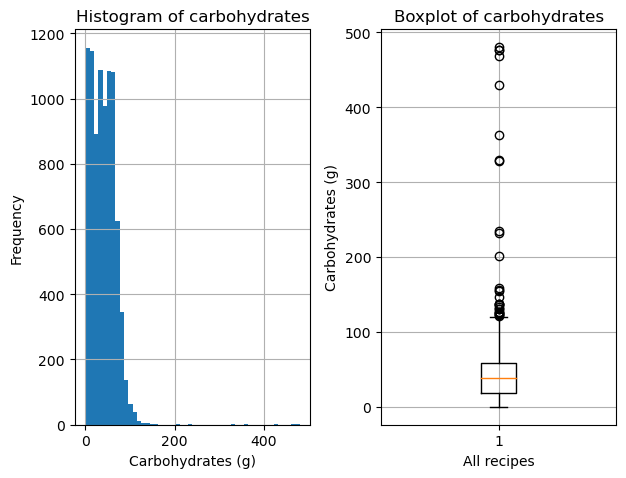

In [11]:
# ANALYSE 5: KOOLHYDRATEN CATEGORY

# make dataframe copy for carbohydrates
nutritions_carbs = nutritions[nutritions_filters.get('koolhydraten')].copy()
nutritions_carbs = nutritions_carbs.set_index('recipe')

# convert 'value' column type to int64
nutritions_carbs['value'] = nutritions_carbs['value'].str.replace(' g', '').astype(float).astype(int)

# retain unit of measurement
nutritions_carbs['unit'] = 'g'
display(nutritions_carbs.head())

# histogram and boxplot of carbohydrates
fig, (carbs_ax1, carbs_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
carbs_ax1.hist(nutritions_carbs['value'], bins=50)
carbs_ax1.set_xlabel('Carbohydrates (g)')
carbs_ax1.set_ylabel('Frequency')
carbs_ax1.set_title('Histogram of carbohydrates')
carbs_ax1.grid()

# boxplot
carbs_ax2.boxplot(nutritions_carbs['value'])
carbs_ax2.set_xlabel('All recipes')
carbs_ax2.set_ylabel('Carbohydrates (g)')
carbs_ax2.set_title('Boxplot of carbohydrates')
carbs_ax2.grid()

plt.show()

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,waarvan suikers,22,g
Kruidnoten in marsepein,waarvan suikers,34,g
Kruidnoten met chocodips,waarvan suikers,23,g
Pepernotentaart met marsepeinstrik,waarvan suikers,39,g
Perencake,waarvan suikers,21,g


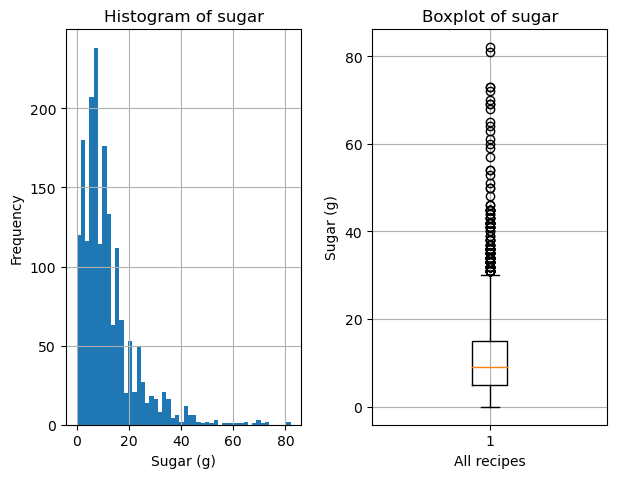

,nutrition,value,unit
recipe,,,
Nectarinejam,waarvan suikers,201,g
Druivenjam maken,waarvan suikers,233,g
Appelschillenboter,waarvan suikers,125,g


In [12]:
# ANALYSE 6: WAARVAN SUIKERS CATEGORY

# make dataframe copy for sugar
nutritions_sugar = nutritions[nutritions_filters.get('waarvan suikers')].copy()
nutritions_sugar = nutritions_sugar.set_index('recipe')

# convert 'value' column type to int64
nutritions_sugar['value'] = nutritions_sugar['value'].str.replace(' g', '').astype(float).astype(int)

# retain unit of measurement
nutritions_sugar['unit'] = 'g'
display(nutritions_sugar.head())

# very large outlier filtering
sugar_outlier_filter = nutritions_sugar['value'] < 100
# sugar_values = nutritions_sugar['value'].value_counts()
# print(fiber_values)

# histogram and boxplot of sugar
fig, (sugar_ax1, sugar_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
sugar_ax1.hist(nutritions_sugar.loc[sugar_outlier_filter, 'value'], bins=50)
sugar_ax1.set_xlabel('Sugar (g)')
sugar_ax1.set_ylabel('Frequency')
sugar_ax1.set_title('Histogram of sugar')
sugar_ax1.grid()

# boxplot
sugar_ax2.boxplot(nutritions_sugar.loc[sugar_outlier_filter, 'value'])
sugar_ax2.set_xlabel('All recipes')
sugar_ax2.set_ylabel('Sugar (g)')
sugar_ax2.set_title('Boxplot of sugar')
sugar_ax2.grid()

plt.show()

# show excluded outliers
sugar_excluded = nutritions_sugar[~sugar_outlier_filter]
display(sugar_excluded)

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,vet,12,g
Kruidnoten in marsepein,vet,9,g
Kruidnoten met chocodips,vet,18,g
Pepernotentaart met marsepeinstrik,vet,33,g
Perencake,vet,11,g


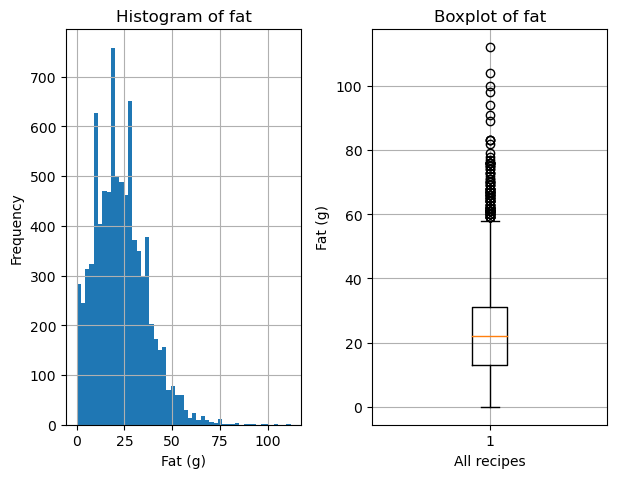

,nutrition,value,unit
recipe,,,
Zelfgemaakte pindakaas,vet,253,g


In [13]:
# ANALYSE 7: VET CATEGORY

# make dataframe copy for fat
nutritions_fat = nutritions[nutritions_filters.get('vet')].copy()
nutritions_fat = nutritions_fat.set_index('recipe')

# convert 'value' column type to int64
nutritions_fat['value'] = nutritions_fat['value'].str.replace(' g', '').astype(float).astype(int)

# retain unit of measurement
nutritions_fat['unit'] = 'g'
display(nutritions_fat.head())

# very large outlier filtering
fat_outlier_filter = nutritions_fat['value'] < 125
# fat_values = nutritions_fat['value'].value_counts()
# print(fat_values)

# histogram and boxplot of fat
fig, (fat_ax1, fat_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
fat_ax1.hist(nutritions_fat.loc[fat_outlier_filter, 'value'], bins=50)
fat_ax1.set_xlabel('Fat (g)')
fat_ax1.set_ylabel('Frequency')
fat_ax1.set_title('Histogram of fat')
fat_ax1.grid()

# boxplot
fat_ax2.boxplot(nutritions_fat.loc[fat_outlier_filter, 'value'])
fat_ax2.set_xlabel('All recipes')
fat_ax2.set_ylabel('Fat (g)')
fat_ax2.set_title('Boxplot of fat')
fat_ax2.grid()

plt.show()

# show excluded outliers
fat_excluded = nutritions_fat[~fat_outlier_filter]
display(fat_excluded)

,nutrition,value,unit
recipe,,,
Kruidnoten met choco-discodip,waarvan verzadigd,7,g
Kruidnoten in marsepein,waarvan verzadigd,4,g
Kruidnoten met chocodips,waarvan verzadigd,10,g
Pepernotentaart met marsepeinstrik,waarvan verzadigd,21,g
Perencake,waarvan verzadigd,2,g


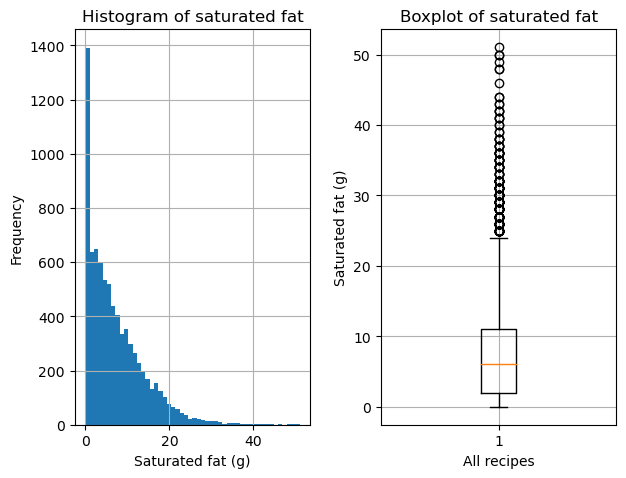

,nutrition,value,unit
recipe,,,
Broodje kipburger met snelle salade,waarvan verzadigd,100,g
Rendang Padang van Vanja van der Leeden,waarvan verzadigd,68,g
Runderballetjes met broccoli & kikkererwten uit de oven,waarvan verzadigd,111,g


In [14]:
# ANALYSE 8: WAARVAN VERZADIGD CATEGORY

# make dataframe copy for saturated fat
nutritions_saturated = nutritions[nutritions_filters.get('waarvan verzadigd')].copy()
nutritions_saturated = nutritions_saturated.set_index('recipe')

# convert 'value' column type to int64
nutritions_saturated['value'] = nutritions_saturated['value'].str.replace(' g', '').astype(float).astype(int)

# retain unit of measurement
nutritions_saturated['unit'] = 'g'
display(nutritions_saturated.head())

# very large outlier filtering
saturated_outlier_filter = nutritions_saturated['value'] < 60
# saturated_values = nutritions_saturated['value'].value_counts()
# print(saturated_values)

# histogram and boxplot of saturated fat
fig, (saturated_ax1, saturated_ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=2.0)

# histogram
saturated_ax1.hist(nutritions_saturated.loc[saturated_outlier_filter, 'value'], bins=50)
saturated_ax1.set_xlabel('Saturated fat (g)')
saturated_ax1.set_ylabel('Frequency')
saturated_ax1.set_title('Histogram of saturated fat')
saturated_ax1.grid()

# boxplot
saturated_ax2.boxplot(nutritions_saturated.loc[saturated_outlier_filter, 'value'])
saturated_ax2.set_xlabel('All recipes')
saturated_ax2.set_ylabel('Saturated fat (g)')
saturated_ax2.set_title('Boxplot of saturated fat')
saturated_ax2.grid()

plt.show()

# show excluded outliers
saturated_excluded = nutritions_saturated[~saturated_outlier_filter]
display(saturated_excluded)

In [15]:
# CREATE FINAL DATAFRAME 'food'

food = recipes.loc[:, 'title'].to_frame().copy()
food = food.rename(columns={'title': 'recipe'})
food = food.set_index('recipe')

# link category 1: energy
food = food.join(nutritions_energy)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'energy_kcal'})
food['energy_kcal'] = food['energy_kcal'].fillna(0)
food['energy_kcal'] = food['energy_kcal'].astype(int)

# link category 2: natrium
food = food.join(nutritions_natrium)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'natrium_mg'})
food['natrium_mg'] = food['natrium_mg'].fillna(0)
food['natrium_mg'] = food['natrium_mg'].astype(int)

# link category 3: protein
food = food.join(nutritions_protein)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'protein_g'})
food['protein_g'] = food['protein_g'].fillna(0)
food['protein_g'] = food['protein_g'].astype(int)

# link category 4: fiber
food = food.join(nutritions_fiber)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'fiber_g'})
food['fiber_g'] = food['fiber_g'].fillna(0)
food['fiber_g'] = food['fiber_g'].astype(int)

# link category 5: carbohydrates
food = food.join(nutritions_carbs)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'carbohydrates_total_g'})
food['carbohydrates_total_g'] = food['carbohydrates_total_g'].fillna(0)
food['carbohydrates_total_g'] = food['carbohydrates_total_g'].astype(int)

# link category 6: sugar
food = food.join(nutritions_sugar)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'carbohydrates_sugar_g'})
food['carbohydrates_sugar_g'] = food['carbohydrates_sugar_g'].fillna(0)
food['carbohydrates_sugar_g'] = food['carbohydrates_sugar_g'].astype(int)

# link category 7: fat
food = food.join(nutritions_fat)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'fat_total_g'})
food['fat_total_g'] = food['fat_total_g'].fillna(0)
food['fat_total_g'] = food['fat_total_g'].astype(int)

# link category 8: saturated
food = food.join(nutritions_saturated)
food = food.drop(columns=['nutrition', 'unit'])
food = food.rename(columns={'value': 'fat_saturated_g'})
food['fat_saturated_g'] = food['fat_saturated_g'].fillna(0)
food['fat_saturated_g'] = food['fat_saturated_g'].astype(int)

display(food)
print(food.info())

,energy_kcal,natrium_mg,protein_g,fiber_g,carbohydrates_total_g,carbohydrates_sugar_g,fat_total_g,fat_saturated_g
recipe,,,,,,,,
Kruidnoten met choco-discodip,260,200,3,1,34,22,12,7
Kruidnoten in marsepein,265,120,3,1,43,34,9,4
Kruidnoten met chocodips,335,160,5,6,35,23,18,10
Pepernotentaart met marsepeinstrik,560,240,5,1,60,39,33,21
Perencake,265,120,5,1,36,21,11,2
...,...,...,...,...,...,...,...,...
Paddenstoelen en courgettegratin,285,0,11,0,13,0,20,0
Peren-amandelcoupe,160,0,1,0,29,0,1,0
Ceviche met sint-jakobsschelpen,210,0,14,0,7,0,13,0


<class 'pandas.core.frame.DataFrame'>
Index: 8706 entries, Kruidnoten met choco-discodip to Biefstuk met rodewijnsaus en ham
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   energy_kcal            8706 non-null   int64
 1   natrium_mg             8706 non-null   int64
 2   protein_g              8706 non-null   int64
 3   fiber_g                8706 non-null   int64
 4   carbohydrates_total_g  8706 non-null   int64
 5   carbohydrates_sugar_g  8706 non-null   int64
 6   fat_total_g            8706 non-null   int64
 7   fat_saturated_g        8706 non-null   int64
dtypes: int64(8)
memory usage: 870.2+ KB
None


In [16]:
# EXPLORE: TAG DATAFRAME

tag_counts = tags['tag'].value_counts() #118
print(tag_counts.head(10))
print(tags.head(10))

hoofdgerecht           4595
wat eten we vandaag    2768
oven                   2542
lactosevrij            1923
glutenvrij             1679
koken                  1588
bakken                 1495
vegetarisch            1435
gebak                  1291
bijgerecht             1277
Name: tag, dtype: int64
                          recipe               tag
0  Kruidnoten met choco-discodip          hollands
1  Kruidnoten met choco-discodip             gebak
2  Kruidnoten met choco-discodip             gebak
3  Kruidnoten met choco-discodip       sinterklaas
4  Kruidnoten met choco-discodip  sinterklaasavond
5        Kruidnoten in marsepein          hollands
6        Kruidnoten in marsepein             gebak
7        Kruidnoten in marsepein             gebak
8        Kruidnoten in marsepein       sinterklaas
9        Kruidnoten in marsepein  sinterklaasavond


In [17]:
# label all recipes in 'food' whether they are vegeterian or not

vegeterian_filter = tags['tag'] == 'vegetarisch'
vegeterian_recipes = tags[vegeterian_filter]
vegeterian_recipes = vegeterian_recipes.set_index('recipe')
#display(vegeterian_recipes)

#food['vegeterian'] = np.nan
for index, row in food.iterrows():
    if index in vegeterian_recipes.index:
        food.loc[index, 'vegeterian'] = 1
    else:
        food.loc[index, 'vegeterian'] = 0

food['vegeterian'] = food['vegeterian'].astype(int)
display(food)

# assert the right amount of recipes are labeled
assert (food['vegeterian'] == 1).sum() == vegeterian_filter.sum() # 1435
assert (food['vegeterian'] == 0).sum() == len(food['vegeterian']) - vegeterian_filter.sum() # 7271

,energy_kcal,natrium_mg,protein_g,fiber_g,carbohydrates_total_g,carbohydrates_sugar_g,fat_total_g,fat_saturated_g,vegeterian
recipe,,,,,,,,,
Kruidnoten met choco-discodip,260,200,3,1,34,22,12,7,0
Kruidnoten in marsepein,265,120,3,1,43,34,9,4,0
Kruidnoten met chocodips,335,160,5,6,35,23,18,10,0
Pepernotentaart met marsepeinstrik,560,240,5,1,60,39,33,21,0
Perencake,265,120,5,1,36,21,11,2,0
...,...,...,...,...,...,...,...,...,...
Paddenstoelen en courgettegratin,285,0,11,0,13,0,20,0,0
Peren-amandelcoupe,160,0,1,0,29,0,1,0,0
Ceviche met sint-jakobsschelpen,210,0,14,0,7,0,13,0,0


In [18]:
# SIMULATE USER INPUT

# columns: user_id, gender, age, height_m, weight_kg, bmi, pa_level, pa_activity, daily_kcal

sim_user_amount = 200
np.random.seed(177)

# generate 1: user_id
user_ids = np.array([('U' + str(n).zfill(3)) for n in range(0, sim_user_amount)])
print(user_ids[0:10])

# genereate 2: gender
random_ints = np.random.randint(2, size=sim_user_amount)
genders = np.array(['male' if n == 0 else 'female' for n in random_ints])
print(genders[0:10])
        
# generate 3: age
ages = np.array([])
group_20_40 = int(0.36 * sim_user_amount) # 72 out of 200 (36%)
group_40_65 = int(0.46 * sim_user_amount) # 92 out of 200 (46%)
group_65_80 = int(0.18 * sim_user_amount) # 36 out of 200 (18%)
ages_20_40 = np.random.randint(20, 40, group_20_40)
ages_40_65 = np.random.randint(40, 65, group_40_65)
ages_65_80 = np.random.randint(65, 80, group_65_80)
ages = np.concatenate((ages_20_40, ages_40_65, ages_65_80))
ages = ages.astype(int)
print(ages[0:10])

# generate 4: height_m
heights = np.array([])
unique, counts = np.unique(genders, return_counts=True) # 106 male, 94 female
gender_amount = dict(zip(unique, counts))
for gender in genders:
    if gender == 'male':
        height_value = np.round(np.random.normal(1.81, 0.06, 1), 2)
        heights = np.append(heights, height_value)
    else:
        height_value = np.round(np.random.normal(1.67, 0.06, 1), 2)
        heights = np.append(heights, height_value)
print(heights[0:10])

# generate 5: weight_kg
weights = np.array([])
for gender in genders:
    if gender == 'male':
        weight_value = np.round(np.random.normal(85, 4, 1), 0)
        weights = np.append(weights, weight_value)
    else:
        weight_value = np.round(np.random.normal(72, 4, 1), 0)
        weights = np.append(weights, weight_value)
weights = weights.astype(int)
print(weights[0:10])

# generate 6: bmi
bmis = np.round(weights / (heights ** 2), 1)
print(bmis[0:10])

# generate 7 and 8: physical_level and physical_activity
pa_levels = np.array([])
pa_activities = np.array([])
pa_levels_unique = ['sedentary', 'low active', 'active', 'very active']
pa_probabilities = [0.15, 0.45, 0.35, 0.05]
pa_gender_level = {
    'male': {
        'sedentary': 1.00,
        'low active': 1.12,
        'active': 1.27,
        'very active': 1.54
    },
    'female': {
        'sedentary': 1.00,
        'low active': 1.14,
        'active': 1.27,
        'very active': 1.45
    }
}
for gender in genders:
    pa_level = np.random.choice(a=pa_levels_unique, size=1, p=pa_probabilities)[0]
    pa_levels = np.append(pa_levels, pa_level)
    pa_activity = pa_gender_level.get(gender).get(pa_level)
    pa_activities = np.append(pa_activities, pa_activity)
print(pa_levels[0:10])
print(pa_activities[0:10])

# generate 9: daily_kcal
# male: 864 − 9.72 × age + PA × (14.2 × weight + 503 × height)
# female: 387 − 7.31 × age + PA × (10.9 × weight + 660.7 × height)
daily_kcals = np.array([])
for gender in genders:
    if gender == 'male':
        calc_kcal = 864 - 9.72 * ages + pa_activities * (14.2 * weights + 503 * heights)
        daily_kcals = np.round(calc_kcal, 0)
    else:
        calc_kcal = 387 - 7.31 * ages + pa_activities * (10.9 * weights + 660.7 * heights)
        daily_kcals = np.round(calc_kcal, 0)
daily_kcals = daily_kcals.astype(int)
print(daily_kcals[0:10])

# assert all list-likes are a 'numpy.ndarray'
assert type(user_ids) == np.ndarray
assert type(ages) == np.ndarray
assert type(user_ids) == np.ndarray
assert type(heights) == np.ndarray
assert type(weights) == np.ndarray
assert type(pa_levels) == np.ndarray
assert type(pa_activities) == np.ndarray
assert type(daily_kcals) == np.ndarray

['U000' 'U001' 'U002' 'U003' 'U004' 'U005' 'U006' 'U007' 'U008' 'U009']
['female' 'female' 'male' 'male' 'female' 'male' 'female' 'female'
 'female' 'male']
[33 29 27 35 36 21 23 28 29 29]
[1.6  1.66 1.74 1.76 1.74 1.72 1.66 1.71 1.68 1.71]
[73 66 83 88 74 81 72 73 78 84]
[28.5 24.  27.4 28.4 24.4 27.4 26.1 25.  27.6 28.7]
['sedentary' 'low active' 'low active' 'low active' 'low active' 'active'
 'active' 'active' 'low active' 'low active']
[1.   1.14 1.12 1.12 1.14 1.27 1.27 1.27 1.14 1.12]
[2385 2602 2902 2915 2710 3219 2999 3001 2808 2881]


In [42]:
# TRANSFORM SIMULATED USER INPUT INTO DATAFRAME

sim_users = {
    'user_id': user_ids,
    'gender': genders,
    'age': ages,
    'height_m': heights,
    'weight_kg': weights,
    'bmi': bmis,
    'pa_level': pa_levels,
    'pa_activity': pa_activities,
    'daily_kcal': daily_kcals
}
users = pd.DataFrame(data=sim_users)

# ADD DAILY INTAKE COLUMNS CORRESPONDING TO THE 8 NUTRITION CATEGORIES

# 1. daily energy
# already done (daily_kcal)

# 2. daily natrium
users['daily_natrium_min_mg'] = 0
users['daily_natrium_min_mg'] = users['daily_natrium_min_mg'].astype(int)

users['daily_natrium_max_mg'] = 2400
users['daily_natrium_max_mg'] = users['daily_natrium_max_mg'].astype(int)

# 3. daily protein
users['daily_protein_min_g'] = 0.996 * users['weight_kg']
users['daily_protein_min_g'] = users['daily_protein_min_g'].round(0).astype(int)

users['daily_protein_max_g'] = 1.079 * users['weight_kg']
users['daily_protein_max_g'] = users['daily_protein_max_g'].round(0).astype(int)

# 4. daily fiber
users['daily_fiber_min_g'] = (users['daily_kcal'] / 1000) * 14
users['daily_fiber_min_g'] = users['daily_fiber_min_g'].round(0).astype(int)

users['daily_fiber_max_g'] = 55
users['daily_fiber_max_g'] = users['daily_fiber_max_g'].astype(int)

# 5. daily carbohydrates
users['daily_carbohydrates_min_g'] = (0.45 * users['daily_kcal']) / 4
users['daily_carbohydrates_min_g'] = users['daily_carbohydrates_min_g'].round(0).astype(int)

users['daily_carbohydrates_max_g'] = (0.65 * users['daily_kcal']) / 4
users['daily_carbohydrates_max_g'] = users['daily_carbohydrates_max_g'].round(0).astype(int)

# 6. daily sugar
users['daily_sugar_min_g'] = 0
users['daily_sugar_min_g'] = users['daily_sugar_min_g'].astype(int)

users['daily_sugar_max_g'] = (0.1 * users['daily_kcal']) / 4
users['daily_sugar_max_g'] = users['daily_sugar_max_g'].round(0).astype(int)

# 7 daily fat
users['daily_fat_min_g'] = (0.2 * users['daily_kcal']) / 9
users['daily_fat_min_g'] = users['daily_fat_min_g'].round(0).astype(int)

users['daily_fat_max_g'] = (0.3 * users['daily_kcal']) / 9
users['daily_fat_max_g'] = users['daily_fat_max_g'].round(0).astype(int)

# daily saturated fat
users['daily_fat_saturated_min_g'] = 0
users['daily_fat_saturated_min_g'] = users['daily_fat_saturated_min_g'].astype(int)

users['daily_fat_saturated_max_g'] = (0.1 * users['daily_kcal']) / 9
users['daily_fat_saturated_max_g'] = users['daily_fat_saturated_max_g'].astype(int)

display(users.head())
print(users.info())

,user_id,gender,age,height_m,weight_kg,bmi,pa_level,pa_activity,daily_kcal,daily_natrium_min_mg,...,daily_fiber_min_g,daily_fiber_max_g,daily_carbohydrates_min_g,daily_carbohydrates_max_g,daily_sugar_min_g,daily_sugar_max_g,daily_fat_min_g,daily_fat_max_g,daily_fat_saturated_min_g,daily_fat_saturated_max_g
0,U000,female,33,1.60,73,28.5,sedentary,1.00,2385,0,...,33,55,268,388,0,60,53,80,0,26
1,U001,female,29,1.66,66,24.0,low active,1.14,2602,0,...,36,55,293,423,0,65,58,87,0,28
2,U002,male,27,1.74,83,27.4,low active,1.12,2902,0,...,41,55,326,472,0,73,64,97,0,32
3,U003,male,35,1.76,88,28.4,low active,1.12,2915,0,...,41,55,328,474,0,73,65,97,0,32
4,U004,female,36,1.74,74,24.4,low active,1.14,2710,0,...,38,55,305,440,0,68,60,90,0,30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    200 non-null    object 
 1   gender                     200 non-null    object 
 2   age                        200 non-null    int64  
 3   height_m                   200 non-null    float64
 4   weight_kg                  200 non-null    int64  
 5   bmi                        200 non-null    float64
 6   pa_level                   200 non-null    object 
 7   pa_activity                200 non-null    float64
 8   daily_kcal                 200 non-null    int64  
 9   daily_natrium_min_mg       200 non-null    int64  
 10  daily_natrium_max_mg       200 non-null    int64  
 11  daily_protein_min_g        200 non-null    int64  
 12  daily_protein_max_g        200 non-null    int64  
 13  daily_fiber_min_g          200 non-null    int64  

In [20]:
# ADD EACH RECIPE AS COLUMN TO USER SIMULATION

recipe_cols = food[food['vegeterian'] == 1].transpose()
recipe_cols = recipe_cols.reset_index(drop=True)
recipe_cols = recipe_cols.drop(range(0, len(recipe_cols)))
user_ratings = users.join(recipe_cols)

In [21]:
# FILL EACH RECIPE BY USER A LIKE (1) OR DISLIKE (0)

# values that replace NaN
ratings_unique = np.array([0, 1])
ratings_probabilities = np.array([0.5, 0.5])

# row and column indices with NaN
col_inds = np.array(range(9, len(user_ratings.columns)))
row_inds = np.array(range(0, len(user_ratings)))

# change NaN per column per row to value
for col_ind in col_inds:
    for row_ind in row_inds:
        #if user_ratings.iloc[row_ind, 'gender'] == 'female'
        user_ratings.iat[row_ind, col_ind] = np.random.choice(a=ratings_unique, size=1, p=ratings_probabilities)[0]
    user_ratings.iloc[:, col_ind] = user_ratings.iloc[:, col_ind].astype(int)
display(user_ratings.head())

,user_id,gender,age,height_m,weight_kg,bmi,pa_level,pa_activity,daily_kcal,Pierogi,...,Aardappel en tomaatpakketjes,Aardappel en prei,Aardappel en peen,Krieltjes en courgette,Aardappelen en paprika uit de oven,Aardappel en auberginefrites,Aardappel en knolselderij,Falafelburger,Ovenpasta met ei,Honingwortel met abrikoos
0,U000,female,33,1.60,73,28.5,sedentary,1.00,2385,1,...,0,0,0,1,1,1,1,1,0,1
1,U001,female,29,1.66,66,24.0,low active,1.14,2602,1,...,0,1,0,1,1,1,0,0,0,0
2,U002,male,27,1.74,83,27.4,low active,1.12,2902,1,...,0,0,0,1,0,0,0,1,0,1
3,U003,male,35,1.76,88,28.4,low active,1.12,2915,0,...,0,1,1,0,0,0,1,0,1,1
4,U004,female,36,1.74,74,24.4,low active,1.14,2710,1,...,0,1,0,1,0,1,0,1,1,0


In [22]:
# CREATE COMBINATIONS OF VEGETERIAN RECIPES AND USERS

# filter out only vegeterian recipes out of 'food' dataframe
veg_food = food[food['vegeterian'] == 1]
veg_food = veg_food.reset_index()

# create cartesian product of vegeterian recipes and users
veg_food_users = veg_food.merge(users, how='cross')
veg_food_users['rating'] = np.nan

# create some patterns for 'rating' column
mean_protein_g = veg_food_users['protein_g'].mean()
mean_fiber_g = veg_food_users['fiber_g'].mean()
mean_fat_saturated_g = veg_food_users['fat_saturated_g'].mean()
for index, row in veg_food_users.iterrows():
    # male and above average protein = like
    if row['gender'] == 'male' and row['protein_g'] > mean_protein_g:
        veg_food_users.at[index, 'rating'] = 1
    # female and above average fiber = like
    elif row['gender'] == 'female' and row['fiber_g'] > mean_fiber_g:
        veg_food_users.at[index, 'rating'] = 1
    # above average saturated fat = dislike
    elif row['fat_saturated_g'] > mean_fat_saturated_g:
        veg_food_users.at[index, 'rating'] = 0
    # everything else = dislike
    else:
        veg_food_users.at[index, 'rating'] = 0

veg_food_users['rating'] = veg_food_users['rating'].astype(int)
display(veg_food_users.head())

,recipe,energy_kcal,natrium_mg,protein_g,fiber_g,carbohydrates_total_g,carbohydrates_sugar_g,fat_total_g,fat_saturated_g,vegeterian,user_id,gender,age,height_m,weight_kg,bmi,pa_level,pa_activity,daily_kcal,rating
0,Pierogi,115,80,2,1,10,1,7,5,1,U000,female,33,1.60,73,28.5,sedentary,1.00,2385,0
1,Pierogi,115,80,2,1,10,1,7,5,1,U001,female,29,1.66,66,24.0,low active,1.14,2602,0
2,Pierogi,115,80,2,1,10,1,7,5,1,U002,male,27,1.74,83,27.4,low active,1.12,2902,0
3,Pierogi,115,80,2,1,10,1,7,5,1,U003,male,35,1.76,88,28.4,low active,1.12,2915,0
4,Pierogi,115,80,2,1,10,1,7,5,1,U004,female,36,1.74,74,24.4,low active,1.14,2710,0


In [23]:
# check like to dislike amount
print(veg_food_users['rating'].value_counts())

0    163838
1    123162
Name: rating, dtype: int64
